In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/machin learn/machin/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df['Outcome'].value_counts()


,count
Outcome,
0,500
1,268


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Columns where 0 might mean missing
cols_with_zero_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero_missing:
    print(f"{col} has {df[df[col] == 0].shape[0]} zero values")


Glucose has 5 zero values
BloodPressure has 35 zero values
SkinThickness has 227 zero values
Insulin has 374 zero values
BMI has 11 zero values


In [ ]:
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:

# Then check for missing values
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


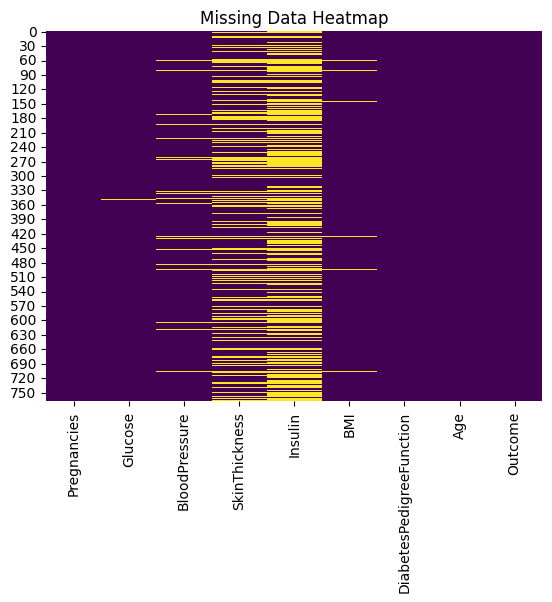

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()


In [ ]:
df[cols_to_fix] = df[cols_to_fix].fillna(df[cols_to_fix].median())

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [ ]:
df_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [ ]:
df=df_imputed

In [ ]:
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [ ]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [ ]:
y.head()

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,stratify=y,random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Train model
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)

y_pred1 = model1.predict(X_test)
score1 = accuracy_score(y_test,y_pred1)

In [ ]:
score,score1

(0.7291666666666666, 0.7604166666666666)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

scores = []
scores1 = []

# Scale input features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

for i in range(1000):
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        x_scaled, y, test_size=0.25, stratify=y, random_state=i)

    # Logistic Regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    # Random Forest
    model1 = RandomForestClassifier()
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_test)
    score1 = accuracy_score(y_test, y_pred1)

    # Collect scores
    scores.append(score)
    scores1.append(score1)

# Print average performance
print("Logistic Regression Average Accuracy:", np.mean(scores))
print("Random Forest Average Accuracy:", np.mean(scores1))


Logistic Regression Average Accuracy: 0.7667760416666668
Random Forest Average Accuracy: 0.759796875


In [ ]:
value = np.argmax(scores)
value1 = np.argmax(scores1)
a = scores[value]
b = scores1[value1]

print(f"Model: value: {value} accuracy: {a} Model1: value :{value1} accuracy: {b}")

Model: value: 524 accuracy: 0.8333333333333334 Model1: value :160 accuracy: 0.8541666666666666


In [ ]:
import joblib

# Save
joblib.dump(model, '/content/drive/MyDrive/machin learn/diabetes_model.pkl')
joblib.dump(model1, '/content/drive/MyDrive/machin learn/diabetes_model1.pkl')
# Load later
# model = joblib.load('diabetes_model.pkl')


['/content/drive/MyDrive/machin learn/diabetes_model1.pkl']

In [ ]:
model = joblib.load('/content/drive/MyDrive/machin learn/diabetes_model.pkl')
model1 = joblib.load('/content/drive/MyDrive/machin learn/diabetes_model1.pkl')

In [ ]:
def DiabetesPredictFunction(input_data, model):
    """
    Predict diabetes (0 or 1) from input features using a trained model.

    Parameters:
    - input_data: tuple or list of 8 numeric features
    - model: trained sklearn model

    Returns:
    - prediction: 0 (No Diabetes) or 1 (Diabetes)
    """
    input_array = np.asarray(input_data).reshape(1, -1)
    prediction = model.predict(input_array)[0]
    return "Diabetic" if prediction == 1 else "Not Diabetic"


In [ ]:
# Example input: Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
user_input = (0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0)
result = DiabetesPredictFunction(user_input, model)
print("Prediction:", result)


Prediction: Diabetic


In [ ]:
# Example input: Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
user_input = (0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0)
result = DiabetesPredictFunction(user_input, model1)
print("Prediction:", result)


Prediction: Diabetic


In [ ]:
# Get user input as comma-separated values
user_input = input("Enter 8 values separated by commas (Pregnancies, Glucose, BP, SkinThickness, Insulin, BMI, DPF, Age): ")

# Convert to float tuple
user_input = tuple(map(float, user_input.split(',')))

# Make prediction
result = DiabetesPredictFunction(user_input, model)
print("Prediction:", result)


In [ ]:
0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0